# Shelter Competition

https://www.kaggle.com/c/shelter-animal-outcomes

In [89]:
import pandas as pd
import numpy as np

# libraries play with graphs
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# general python functions
# trainData.head() ou trainData.tail()
# trainData.describe() ou trainData.describe
# len(trainData) ou trainData.shape


In [90]:
# read datasets
trainData = pd.read_csv('data/train.csv')
testData = pd.read_csv('data/test.csv')

In [91]:
# cross tab categorical data
pd.crosstab(trainData["AnimalType"], trainData["OutcomeType"], margins = True)

OutcomeType,Adoption,Died,Euthanasia,Return_to_owner,Transfer,All
AnimalType,,,,,,
Cat,4272,147,710,500,5505,11134
Dog,6497,50,845,4286,3917,15595
All,10769,197,1555,4786,9422,26729


In [92]:
# check the percentage of missing values in the columns
print(trainData.apply(lambda x: sum(x.isnull().values), axis = 0)/trainData.shape[0])

# check the percentage of missing values in the rows
#print(trainData.apply(lambda x: sum(x.isnull().values), axis = 1))

AnimalID          0.000000
Name              0.287740
DateTime          0.000000
OutcomeType       0.000000
OutcomeSubtype    0.509260
AnimalType        0.000000
SexuponOutcome    0.000037
AgeuponOutcome    0.000673
Breed             0.000000
Color             0.000000
dtype: float64


In [93]:
pd.crosstab(trainData["OutcomeType"], trainData["OutcomeSubtype"], margins = True)

OutcomeSubtype,Aggressive,At Vet,Barn,Behavior,Court/Investigation,Enroute,Foster,In Foster,In Kennel,In Surgery,Medical,Offsite,Partner,Rabies Risk,SCRP,Suffering,All
OutcomeType,,,,,,,,,,,,,,,,,
Adoption,0,0,1,0,0,0,1800,0,0,0,0,165,0,0,0,0,1966
Died,0,4,0,0,0,8,0,52,114,3,0,0,0,0,0,0,181
Euthanasia,320,0,0,86,6,0,0,0,0,0,66,0,0,74,0,1002,1554
Transfer,0,0,1,0,0,0,0,0,0,0,0,0,7816,0,1599,0,9416
All,320,4,2,86,6,8,1800,52,114,3,66,165,7816,74,1599,1002,13117


In [94]:
# to list dataset columns
list(trainData.columns.values)

['AnimalID',
 'Name',
 'DateTime',
 'OutcomeType',
 'OutcomeSubtype',
 'AnimalType',
 'SexuponOutcome',
 'AgeuponOutcome',
 'Breed',
 'Color']

In [95]:
#trainData.dtypes

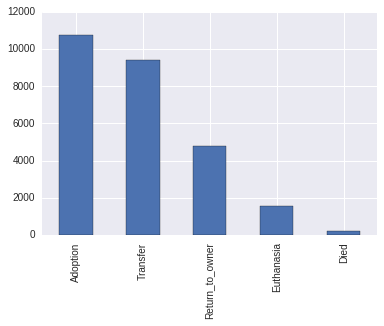

In [96]:
trainData['OutcomeType'].value_counts().plot(kind='bar')

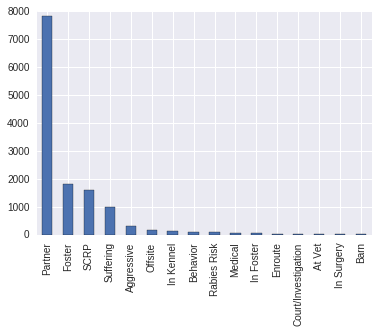

In [97]:
trainData['OutcomeSubtype'].value_counts().plot(kind='bar')

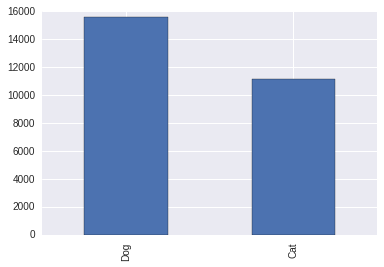

In [98]:
trainData['AnimalType'].value_counts().plot(kind='bar')

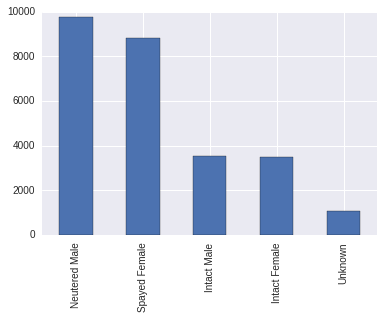

In [99]:
trainData['SexuponOutcome'].value_counts().plot(kind='bar')

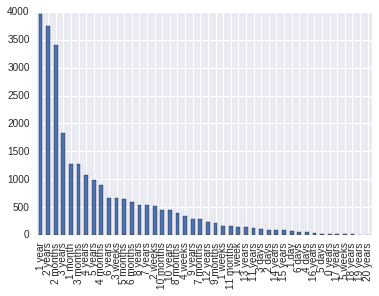

In [100]:
trainData['AgeuponOutcome'].value_counts().plot(kind='bar')

In [101]:
# we need to transform the AgeuponOutcome to be in the same size
trainData['AgeuponOutcome'].value_counts()

1 year       3969
2 years      3742
2 months     3397
3 years      1823
1 month      1281
3 months     1277
4 years      1071
5 years       992
4 months      888
6 years       670
3 weeks       659
5 months      652
6 months      588
8 years       536
7 years       531
2 weeks       529
10 months     457
10 years      446
8 months      402
4 weeks       334
9 years       288
7 months      288
12 years      234
9 months      224
1 weeks       171
11 months     166
1 week        146
13 years      143
11 years      126
3 days        109
2 days         99
14 years       97
15 years       85
1 day          66
6 days         50
4 days         50
16 years       36
5 days         24
0 years        22
17 years       17
5 weeks        11
18 years       10
19 years        3
20 years        2
Name: AgeuponOutcome, dtype: int64

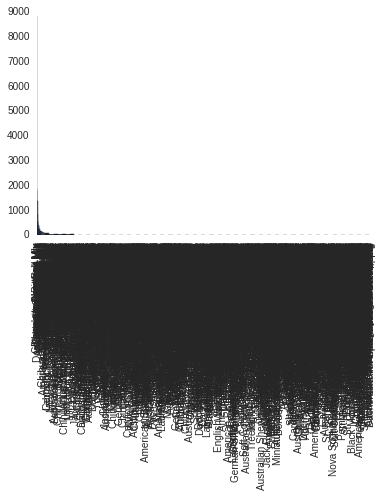

In [102]:
trainData['Breed'].value_counts().plot(kind='bar') 

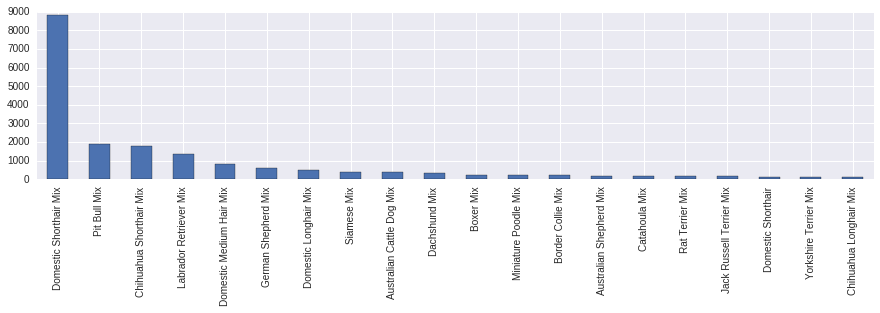

In [103]:
 trainData['Breed'].value_counts()[0:20].plot(kind='bar', figsize=(15,3))

In [104]:
trainData['Name'].value_counts()[:50]

Max         136
Bella       135
Charlie     107
Daisy       106
Lucy         94
Buddy        87
Princess     86
Rocky        85
Luna         68
Jack         66
Lola         61
Sadie        58
Shadow       57
Molly        57
Maggie       55
Coco         55
Chico        54
Oreo         53
Lily         53
Blue         52
Lucky        51
Toby         50
Cookie       48
Ginger       48
Lady         47
Sam          46
Duke         45
Oliver       44
Milo         44
Sophie       44
Leo          43
Rosie        43
Bear         42
Buster       42
Riley        41
Sasha        40
Ruby         40
Marley       39
Peanut       38
Diamond      38
Brownie      38
Jake         38
Rex          37
Cooper       36
Chloe        36
Zeus         36
Penny        35
Minnie       35
Roxy         35
Pepper       35
Name: Name, dtype: int64

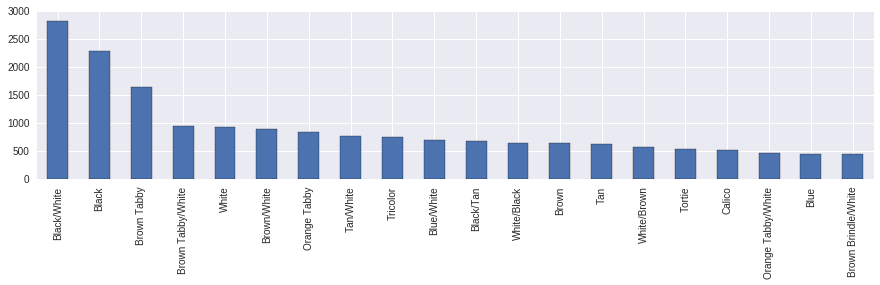

In [105]:
trainData['Color'].value_counts()[0:20].plot(kind='bar', figsize=(15,3))

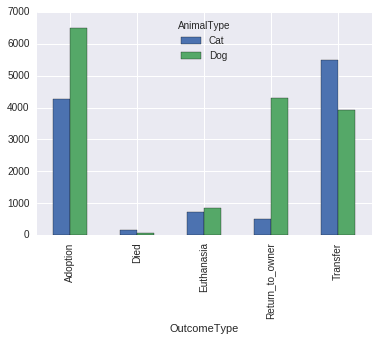

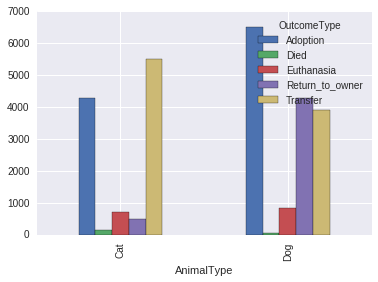

In [106]:
trainData[['AnimalType','OutcomeType']].groupby(['OutcomeType','AnimalType']).size().unstack().plot.bar()

trainData[['AnimalType','OutcomeType']].groupby(['AnimalType','OutcomeType']).size().unstack().plot.bar()

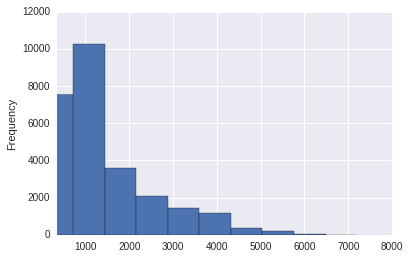

In [107]:
trainData = trainData.fillna('NA')
AgeuponOutcomemapping = {'year' : 360, 'month' : 30,'week': 7,'years' : 360,'months' : 360,'weeks': 7,'days':1,'day' : 1}

def change_AgeuponOutcome_to_days(value):
    if "weeks" in value:
        value = int(value.replace("weeks","")) * AgeuponOutcomemapping['weeks']
    elif "years" in value:
        value = int(value.replace("years","")) * AgeuponOutcomemapping['years']
    elif "months" in value:
        value = int(value.replace("months","")) * AgeuponOutcomemapping['months']
    elif "week" in value:
        value = int(value.replace("week","")) * AgeuponOutcomemapping['week']
    elif "year" in value:
        value = int(value.replace("year","")) * AgeuponOutcomemapping['year']
    elif "month" in value:
        value = int(value.replace("month","")) * AgeuponOutcomemapping['month']
    elif "days" in value:
        value = int(value.replace("days","")) * AgeuponOutcomemapping['days']
    elif "day" in value:
        value = int(value.replace("day","")) * AgeuponOutcomemapping['day']
    else:
        value = 0
    
    return int(value)
    
trainData['AgeuponOutcome'] = trainData['AgeuponOutcome'].dropna()

trainData['AgeuponOutcome'] = trainData['AgeuponOutcome'].apply(change_AgeuponOutcome_to_days)

trainData['AgeuponOutcome'].plot.hist(xlim=360)

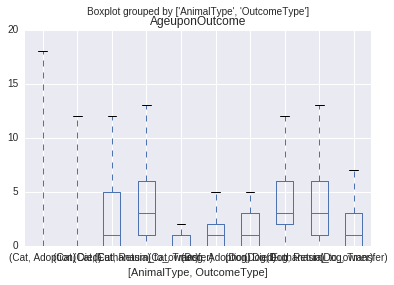

In [108]:
AgeuponOutcomemapping = {'year' : 1, 'month' : 12 ,'week': 54,'years' : 1,'months' : 12,'weeks': 54,'days':360,'day' : 360}
def change_AgeuponOutcome_to_years(value):
    if "weeks" in value:
        value = int(value.replace("weeks","")) / AgeuponOutcomemapping['weeks']
    elif "years" in value: 
        value = int(value.replace("years","")) / AgeuponOutcomemapping['years'] 
    elif "months" in value: 
        value = int(value.replace("months","")) / AgeuponOutcomemapping['months'] 
    elif "week" in value:
        value = int(value.replace("week","")) / AgeuponOutcomemapping['week'] 
    elif "year" in value:
        value = int(value.replace("year","")) / AgeuponOutcomemapping['year'] 
    elif "month" in value:
        value = int(value.replace("month","")) / AgeuponOutcomemapping['month'] 
    elif "days" in value:
        value = int(value.replace("days","")) / AgeuponOutcomemapping['days'] 
    elif "day" in value:
        value = int(value.replace("day","")) / AgeuponOutcomemapping['day'] 
    else:
        value = 0
    
    return int(value)

df = pd.read_csv("data/train.csv",index_col=0)
df = df.fillna('NAN')
df['AgeuponOutcome'] = df['AgeuponOutcome'].dropna()
df['AgeuponOutcome'] = df['AgeuponOutcome'].apply(change_AgeuponOutcome_to_years)
df[['OutcomeType','AgeuponOutcome','AnimalType']].boxplot(by=['AnimalType','OutcomeType'])

#devemos precisar de analisar estes outliers

In [109]:
def age_to_days(item):
    # convert item to list if it is one string
    if type(item) is str:
        item = [item]
    ages_in_days = np.zeros(len(item))
    for i in range(len(item)):
        # check if item[i] is str
        if type(item[i]) is str:
            if 'day' in item[i]:
                ages_in_days[i] = int(item[i].split(' ')[0])
            if 'week' in item[i]:
                ages_in_days[i] = int(item[i].split(' ')[0])*7
            if 'month' in item[i]:
                ages_in_days[i] = int(item[i].split(' ')[0])*30
            if 'year' in item[i]:
                ages_in_days[i] = int(item[i].split(' ')[0])*365    
        else:
            # item[i] is not a string but a nan
            ages_in_days[i] = 0
    return ages_in_days

#https://www.kaggle.com/izzul02/shelter-animal-outcomes/age-gender-breed-and-name-vs-outcome/output